# Week 2
## Exercise 2
- Find the maximum L that satisfies f<sub>u</sub> <= f<sub>T</sub>/10
- V<sub>DS</sub> = 0.55V, V<sub>SB</sub> = 0V, gm_ID = $5V^{-1}$ -> V<sub>GS</sub> is fixed for a given L

In [1]:
# Always run this section first
import numpy as np
import matplotlib.pyplot as plt
from look_up import *
nch = importdata("nch_1v.mat")
pch = importdata("pch_1v.mat")

L: [ 0.05   0.055  0.06   0.08   0.1    0.12   0.14   0.16   0.18   0.2
  0.3    0.4    0.5    0.6    0.7    0.8    0.9    1.     2.     3.
  4.     5.     6.     7.     8.     9.    10.   ]
gm: 0.0031415926535897933
ID: 0.0006283185307179586
JD: [1.62201627e-04 1.54857625e-04 1.48256197e-04 1.28137326e-04
 1.13481340e-04 1.01351328e-04 9.20507393e-05 8.46969643e-05
 7.87365918e-05 7.38052766e-05 5.79781788e-05 4.92516250e-05
 4.35686642e-05 3.77267936e-05 3.32423153e-05 2.96931559e-05
 2.68162577e-05 2.44386166e-05 1.22986889e-05 8.33966916e-06
 6.29827941e-06 5.05638683e-06 4.22226508e-06 3.62377749e-06
 3.17359172e-06 2.82273564e-06 2.54163879e-06]
W: [  3.8736882    4.05739485   4.23805913   4.90347777   5.53675636
   6.19941095   6.82578473   7.41843035   7.98000671   8.51319254
  10.83715536  12.75731573  14.42134026  16.65443762  18.90116632
  21.16038228  23.43050762  25.71006943  51.08825323  75.34094206
  99.76034567 124.26235404 148.81077297 173.38772397 197.98341633
 222.59

C:\Users\Lijin Liu\AppData\Local\Temp\ipykernel_29704\1563330011.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


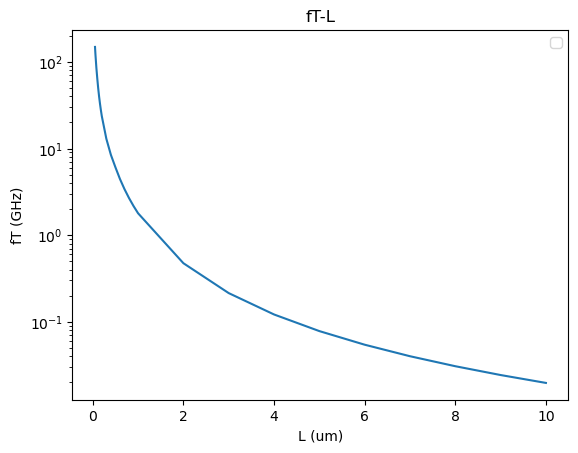

Satisfied L:  [np.float64(0.05), np.float64(0.055), np.float64(0.06), np.float64(0.08), np.float64(0.1), np.float64(0.12), np.float64(0.14), np.float64(0.16), np.float64(0.18000000000000002), np.float64(0.2), np.float64(0.3), np.float64(0.4), np.float64(0.5)]
Maximum L:  0.5
W for L = 0.5:  14.421340258875484
VGS for L = 0.5:  0.7748398918194837
Av for L = 0.5:  21.95063843011655
fT for L = 0.5:  6079773989.655142
W for L = 0.2:  8.513192541882058
VGS for L = 0.2:  0.788232664541688
Av for L = 0.2:  14.746308669032837
fT for L = 0.2:  23631787861.693783


In [2]:
# Set fixed parameters and L
gm_ID = 5
fu = 5e8
CL = 1e-12
VDS = 0.55
L_vec = nch["L"]

# Calculate gm from fu and CL
gm = 2*np.pi*fu*CL
ID = gm / gm_ID
JD = look_up_vs_gm_id(nch, "ID_W", gm_id = gm_ID, vds = VDS, vsb = 0, l = L_vec)
W = ID / JD
fT = look_up_vs_gm_id(nch, "GM_CGG", gm_id = gm_ID, vds = VDS, l = L_vec, vsb = 0)/(2*np.pi)
Av = look_up_vs_gm_id(nch, "GM_GDS", gm_id = gm_ID, vds = VDS, l = L_vec, vsb = 0)

# Print the results
print(f"L: {L_vec}")
print(f"gm: {gm}")
print(f"ID: {ID}")
print(f"JD: {JD}")
print(f"W: {W}")
print(f"fT: {fT}")
print(f"Av: {Av}")

# Plot fT-L
plt.plot(L_vec, fT/1e9)
plt.xlabel("L (um)")
plt.ylabel("fT (GHz)")
plt.yscale("log")
plt.title('fT-L')
plt.legend()
plt.show()

# Find the maximum L that satisfies fu <= fT
L_satisfied = []
for i in range(len(L_vec)):
    if fT[i] / 10 > fu:
        L_satisfied.append(L_vec[i])

print("Satisfied L: ", L_satisfied)
print("Maximum L: ", np.max(L_satisfied))

# Use 2 L values, 0.5, 0.2, to find the corresponding W values and VGS, Av, fT
JD_1 = look_up_vs_gm_id(nch, "ID_W", gm_id = gm_ID, vds = VDS, vsb = 0, l = 0.5)
W_1 = ID / JD_1
VGS_1 = look_up_vgs_vs_gm_id(nch, gm_id = gm_ID, vds = VDS, vsb = 0, l = 0.5)
Av = look_up_vs_gm_id(nch, "GM_GDS", gm_id = gm_ID, vds = VDS, l = 0.5, vsb = 0)
fT = look_up_vs_gm_id(nch, "GM_CGG", gm_id = gm_ID, vds = VDS, l = 0.5, vsb = 0)/(2*np.pi)
print("W for L = 0.5: ", W_1)
print("VGS for L = 0.5: ", VGS_1)
print("Av for L = 0.5: ", Av)
print("fT for L = 0.5: ", fT)
JD_2 = look_up_vs_gm_id(nch, "ID_W", gm_id = gm_ID, vds = VDS, vsb = 0, l = 0.2)
W_2 = ID / JD_2
VGS_2 = look_up_vgs_vs_gm_id(nch, gm_id = gm_ID, vds = VDS, vsb = 0, l = 0.2)
Av = look_up_vs_gm_id(nch, "GM_GDS", gm_id = gm_ID, vds = VDS, l = 0.2, vsb = 0)
fT = look_up_vs_gm_id(nch, "GM_CGG", gm_id = gm_ID, vds = VDS, l = 0.2, vsb = 0)/(2*np.pi)
print("W for L = 0.2: ", W_2)
print("VGS for L = 0.2: ", VGS_2)
print("Av for L = 0.2: ", Av)
print("fT for L = 0.2: ", fT)

- Parameters for simulation
  - $V_{DS} = 0.55V$
  - $V_{SB} = 0V$
  - $I_{D} = 0.0006283185307179586A$
  - Choosed [L, W]: [0.5um, 14.421um] and [0.2um, 8.153um]
  - Finger = 2

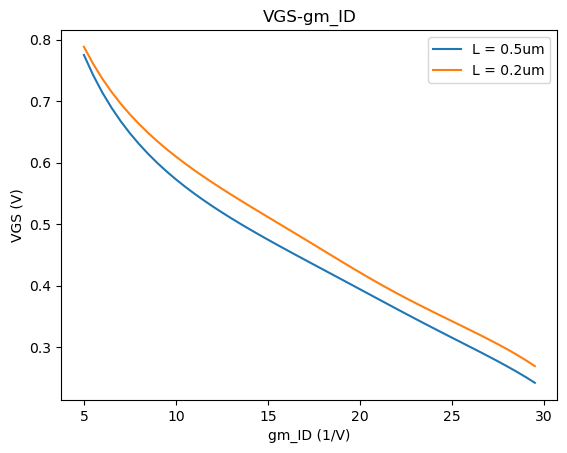

In [3]:
# Plot VGS-gm_ID curve, for reference
gm_ID = np.arange(5, 30, 0.5)
VGS_1 = look_up_vgs_vs_gm_id(nch, gm_id = gm_ID, vds = VDS, vsb = 0, l = 0.5)
VGS_2 = look_up_vgs_vs_gm_id(nch, gm_id = gm_ID, vds = VDS, vsb = 0, l = 0.2)
plt.plot(gm_ID, VGS_1, label = "L = 0.5um")
plt.plot(gm_ID, VGS_2, label = "L = 0.2um")
plt.xlabel("gm_ID (1/V)")
plt.ylabel("VGS (V)")
plt.title("VGS-gm_ID")
plt.legend()
plt.show()

## Exercise 3
- Find the value of gm_ID and L such that fT >= 5GHz and Av is maximized
- CL = 1pF, fu = 500MHz, VDD = 1.1V, VDS = 0.55V


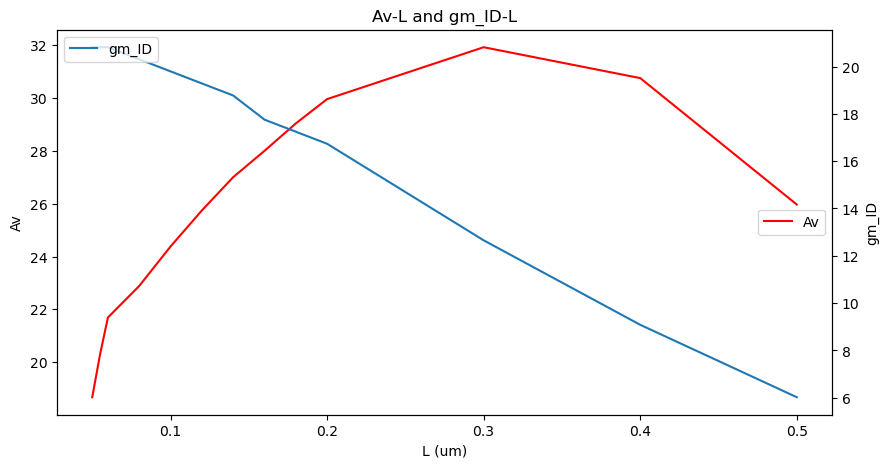

gm_optimized:  0.0031415926535897933
gm_optimized:  0.0031881014109454695
gm_optimized:  0.003188789935763701
gm_optimized:  0.0031888001288209286
gm_optimized:  0.0031888002797209585
gm_optimized:  0.0031888002819549124
gm_optimized:  0.003188800281987984
gm_optimized:  0.0031888002819884737
gm_optimized:  0.003188800281988481
gm_optimized:  0.003188800281988481

gm_optimized: 0.003188800281988481
L_optimized: 0.3
W_optimized: 30.72242169604027
VGS_optimized: 0.5355170758330997
ID_optimized: 0.0002520180868023154
gm_ID_optimized: 12.653061224489797
Av_optimized: 31.930094840096377
fT_optimized: 5236052709.749647


In [4]:
# set parametersgm_ID_vec = np.arange(5, 30, 0.5)
L_vec = nch["L"]
fu = 500e6
CL = 1e-12
VDS = 0.55
gm_ID_vec = np.linspace(5, 30, 50)
gm_ID = []
Av = []

# Find the maximum Av for each L, and then gm_ID, I use my own coding style to do this
Av_optimized = 0
L_optimized = 0
gm_ID_optimized = 0
for i in range(len(L_vec)):
    fT_vec = look_up_vs_gm_id(nch, "GM_CGG", gm_id = gm_ID_vec, vds = VDS, l = L_vec[i], vsb = 0)/(2*np.pi)
    max_gm_ID = 0 # gm_ID greater -> fT lower
    have_value = 0;
    for j in range(len(fT_vec)):
        if((fT_vec[j] >= 10*fu) and (gm_ID_vec[j] > max_gm_ID)):
            max_gm_ID = gm_ID_vec[j]
            have_value = 1;
    if(have_value == 1):
        gm_ID.append(max_gm_ID)
        Av.append(look_up_vs_gm_id(nch, "GM_GDS", gm_id = max_gm_ID, vds = VDS, l = L_vec[i], vsb = 0))
        if(Av[-1] > Av_optimized):
            Av_optimized = Av[-1]
            L_optimized = L_vec[i]
            gm_ID_optimized = max_gm_ID
    else:
        gm_ID.append(float("nan"))
        Av.append(float("nan"))
    
# Plot Av-L and gm_ID-L in the same plot with different y-axis, y_Av on the left, y_gm_ID on the right, with different colors
plt.figure(figsize=(10, 5))
ax1 = plt.subplot(111)
ax1.plot(L_vec, Av, label = "Av", color = "red")
ax1.set_xlabel("L (um)")
ax1.set_ylabel("Av")
ax2 = ax1.twinx()
ax2.plot(L_vec, gm_ID, label = "gm_ID")
ax2.set_ylabel("gm_ID")
ax1.legend(loc="right")
ax2.legend(loc="upper left")
plt.title("Av-L and gm_ID-L")
plt.show()

# get W with a higher precision, fu = gm(W)/(CL + CDD(W))
JD_optimized = look_up_vs_gm_id(nch, "ID_W", gm_id = gm_ID_optimized, vds = VDS, vsb = 0, l = L_optimized)
CDD_W = look_up_vs_gm_id(nch, "CDD_W", gm_id = gm_ID_optimized, vds = VDS, vsb = 0, l = L_optimized)
CDD = 0

for i in range(10): # 10 times of iteration
    gm_optimized = 2*np.pi*fu*(CL + CDD) # Actually can get gm by solving the equation gm = 2*np.pi*fu*(CL + CONST*gm)
    ID_optimized = gm_optimized / gm_ID_optimized
    W_optimized = ID_optimized / JD_optimized
    CDD = W_optimized * CDD_W
    print("gm_optimized: ", gm_optimized)

# Get all the parameters for simulation
VGS_optimized = look_up_vgs_vs_gm_id(nch, gm_id = gm_ID_optimized, vds = VDS, vsb = 0, l = L_optimized)
fT_optimized = look_up_vs_gm_id(nch, "GM_CGG", gm_id = gm_ID_optimized, vds = VDS, l = L_optimized, vsb = 0)/(2*np.pi)

print()
print(f"gm_optimized: {gm_optimized}")
print(f"L_optimized: {L_optimized}")
print(f"W_optimized: {W_optimized}")
print(f"VGS_optimized: {VGS_optimized}")
print(f"ID_optimized: {ID_optimized}")
print(f"gm_ID_optimized: {gm_ID_optimized}")
print(f"Av_optimized: {Av_optimized}")
print(f"fT_optimized: {fT_optimized}")

## Exercise 4
- CS amplifier in Lab 0
- sweep (L, VDS), VSB = 0
- Maximize Av while fu, fT fixed

- My understanding of gm_ID method: If L, VDS, VSB, gm_ID of all transistors are known, DC operating points are fixed

In [6]:
# Set parameters
# I use different names compared to the manual, such as VDS_vec instead of VDS_range
fu = 1e9
fT = fu*10
CL = 1e-12
VDD = 1.1
VDS_vec = np.arange(0.1, 1.1, 0.05)
L_vec = np.arange(0.05, 0.15, 0.01)
gm_ID_matrix = np.zeros((len(L_vec), len(VDS_vec))) # create a matrix full of zeros with the size of L_vec * VDS_vec
gds_ID_matrix = np.zeros((len(L_vec), len(VDS_vec)))
Av_matrix = np.zeros((len(L_vec), len(VDS_vec)))

# sweep VDS and L to get all the parameters
for i in range(len(VDS_vec)): # Sweep VDS
    gm_ID_matrix[:, i] = look_up_vs_gm_cgg(nch, "GM_ID", gm_cgg = 2*np.pi*fT, vds = VDS_vec[i], vsb = 0, l = L_vec)
    gds_ID_matrix[:, i] = look_up_vs_gm_cgg(nch, "GDS_ID", gm_cgg = 2*np.pi*fT, vds = VDS_vec[i], vsb = 0, l = L_vec)
    Av_matrix[:, i] = gm_ID_matrix[:, i] / (gds_ID_matrix[:, i] + 1/(VDD - VDS_vec[i]))

# Find the maximum Av
Av_optimized_index = np.argmax(Av_matrix.flatten())
L_optimized_index, VDS_optimized_index = np.unravel_index(Av_optimized_index, Av_matrix.shape)
VDS_optimized = VDS_vec[VDS_optimized_index]
L_optimized = L_vec[L_optimized_index]
Av_optimized = Av_matrix[L_optimized_index, VDS_optimized_index]

# Get gm_ID_optimized and JD_optimized
gm_ID_optimized = gm_ID_matrix[L_optimized_index, VDS_optimized_index]
print(gm_ID_optimized)
JD_optimized = look_up_vs_gm_id(nch, "ID_W", gm_id = gm_ID_optimized, vds = VDS_optimized, vsb = 0, l = L_optimized)
fT_optimized = look_up_vs_gm_id(nch, "GM_CGG", gm_id = gm_ID_optimized, vds = VDS, l = L_optimized, vsb = 0)/(2*np.pi)

# Get W
CDD_W = look_up_vs_gm_id(nch, "CDD_W", gm_id = gm_ID_optimized, vds = VDS_optimized, vsb = 0, l = L_optimized)
CDD = 0
for i in range(10):
    gm_optimized = 2*(np.pi)*fu*(CL + CDD)
    ID_optimized = gm_optimized / gm_ID_optimized
    W_optimized = ID_optimized / JD_optimized
    CDD = W_optimized * CDD_W
    print("gm_optimized: ", gm_optimized)
    print("CDD", CDD)

# Calculate the parameters for simulation
RD_optimized = (VDD - VDS_optimized) / ID_optimized
VGS_optimized = look_up_vgs_vs_gm_id(nch, gm_id = gm_ID_optimized, vds = VDS_optimized, vsb = 0, l = L_optimized)

print()
print("Results for simulation:")
print(f"RD_optimized: {RD_optimized}")
print(f"VGS_optimized: {VGS_optimized}")
print(f"VDS_optimized: {VDS_optimized}")
print(f"L_optimized: {L_optimized}")
print(f"W_optimized: {W_optimized}")
print(f"ID_optimized: {ID_optimized}")
print(f"gm_optimized: {gm_optimized}")
print(f"Av_optimized: {Av_optimized}")
print(f"fT_optimized: {fT_optimized}")
print(f"Power Consumption: {ID_optimized * VDD}")




16.98844417972931
gm_optimized:  0.006283185307179587
CDD 4.4703741563720094e-14
gm_optimized:  0.006564067199348707
CDD 4.6702166073515974e-14
gm_optimized:  0.006576623670866163
CDD 4.6791503126336487e-14
gm_optimized:  0.006577184992123832
CDD 4.6795496826857845e-14
gm_optimized:  0.006577210085284268
CDD 4.679567536021383e-14
gm_optimized:  0.006577211207042428
CDD 4.679568334132284e-14
gm_optimized:  0.006577211257189215
CDD 4.679568369810827e-14
gm_optimized:  0.006577211259430964
CDD 4.679568371405792e-14
gm_optimized:  0.006577211259531177
CDD 4.6795683714770913e-14
gm_optimized:  0.006577211259535658
CDD 4.67956837148028e-14

Results for simulation:
RD_optimized: 1808.0475837794615
VGS_optimized: 0.4990018538598407
VDS_optimized: 0.40000000000000013
L_optimized: 0.11000000000000001
W_optimized: 92.41365608314506
ID_optimized: 0.00038715795219103214
gm_optimized: 0.006577211259535658
Av_optimized: 7.179187865684029
fT_optimized: 10440275929.540092
Power Consumption: 0.000425873

In [8]:
print(92.385*look_up_basic(nch, "ID", vgs = 0.499, vds = 0.4, vsb = 0, l = 0.11))

0.00038806553997778004


- Redesign lab 2 to meet fu = ? GHz

In [ ]:
# Redesign, only change fu

# I use different names compared to the manual, such as VDS_vec instead of VDS_range
fu = 103.545e6
fT = fu*10
CL = 1e-12
VDD = 1 # The VDD is 1V in lab 0 !!!
VDS_vec = np.arange(0.1, 1.1, 0.05)
L_vec = np.arange(0.05, 0.15, 0.01)
gm_ID_matrix = np.zeros((len(L_vec), len(VDS_vec))) # create a matrix full of zeros with the size of L_vec * VDS_vec
gds_ID_matrix = np.zeros((len(L_vec), len(VDS_vec)))
Av_matrix = np.zeros((len(L_vec), len(VDS_vec)))

# sweep VDS and L to get all the parameters
for i in range(len(VDS_vec)): # Sweep VDS
    gm_ID_matrix[:, i] = look_up_vs_gm_cgg(nch, "GM_ID", gm_cgg = 2*np.pi*fT, vds = VDS_vec[i], vsb = 0, l = L_vec)
    gds_ID_matrix[:, i] = look_up_vs_gm_cgg(nch, "GDS_ID", gm_cgg = 2*np.pi*fT, vds = VDS_vec[i], vsb = 0, l = L_vec)
    Av_matrix[:, i] = gm_ID_matrix[:, i] / (gds_ID_matrix[:, i] + 1/(VDD - VDS_vec[i]))

# Find the maximum Av
Av_optimized_index = np.argmax(Av_matrix.flatten())
L_optimized_index, VDS_optimized_index = np.unravel_index(Av_optimized_index, Av_matrix.shape)
VDS_optimized = VDS_vec[VDS_optimized_index]
L_optimized = L_vec[L_optimized_index]
Av_optimized = Av_matrix[L_optimized_index, VDS_optimized_index]

# Get gm_ID_optimized and JD_optimized
gm_ID_optimized = gm_ID_matrix[L_optimized_index, VDS_optimized_index]
print(gm_ID_optimized)
JD_optimized = look_up_vs_gm_id(nch, "ID_W", gm_id = gm_ID_optimized, vds = VDS_optimized, vsb = 0, l = L_optimized)
fT_optimized = look_up_vs_gm_id(nch, "GM_CGG", gm_id = gm_ID_optimized, vds = VDS, l = L_optimized, vsb = 0)/(2*np.pi)

# Get W
CDD_W = look_up_vs_gm_id(nch, "CDD_W", gm_id = gm_ID_optimized, vds = VDS_optimized, vsb = 0, l = L_optimized)
CDD = 0
for i in range(10):
    gm_optimized = 2*(np.pi)*fu*(CL + CDD)
    ID_optimized = gm_optimized / gm_ID_optimized
    W_optimized = ID_optimized / JD_optimized
    CDD = W_optimized * CDD_W
    print("gm_optimized: ", gm_optimized)
    print("CDD", CDD)

# Calculate the parameters for simulation
RD_optimized = (VDD - VDS_optimized) / ID_optimized
VGS_optimized = look_up_vgs_vs_gm_id(nch, gm_id = gm_ID_optimized, vds = VDS_optimized, vsb = 0, l = L_optimized)

print()
print("Results for simulation:")
print(f"RD_optimized: {RD_optimized}")
print(f"VGS_optimized: {VGS_optimized}")
print(f"VDS_optimized: {VDS_optimized}")
print(f"L_optimized: {L_optimized}")
print(f"W_optimized: {W_optimized}")
print(f"ID_optimized: {ID_optimized}")
print(f"gm_optimized: {gm_optimized}")
print(f"Av_optimized: {Av_optimized}")
print(f"fT_optimized: {fT_optimized}")
print(f"Power Consumption: {ID_optimized * VDD}")


16.92089628921384
gm_optimized:  0.006283185307179587
CDD 4.5171719087379066e-14
gm_optimized:  0.006567007588849451
CDD 4.721220329268815e-14
gm_optimized:  0.006579828329227781
CDD 4.73043754720126e-14
gm_optimized:  0.006580407464110643
CDD 4.7308539047804725e-14
gm_optimized:  0.006580433624628884
CDD 4.73087271236808e-14
gm_optimized:  0.006580434806344466
CDD 4.7308735619391435e-14
gm_optimized:  0.00658043485972459
CDD 4.7308736003157295e-14
gm_optimized:  0.006580434862135862
CDD 4.730873602049265e-14
gm_optimized:  0.006580434862244783
CDD 4.730873602127572e-14
gm_optimized:  0.0065804348622497035
CDD 4.73087360213111e-14

Results for simulation:
RD_optimized: 1671.40664989864
VGS_optimized: 0.5025154387030238
VDS_optimized: 0.3500000000000001
L_optimized: 0.11000000000000001
W_optimized: 91.88678509499117
ID_optimized: 0.00038889398940671814
gm_optimized: 0.0065804348622497035
Av_optimized: 6.563532058725057
fT_optimized: 10631522010.183905
Power Consumption: 0.00038889398940